In [10]:
#only perform once
import sys
!{sys.executable} -m pip install --upgrade networkx


Requirement already up-to-date: networkx in /opt/anaconda3/lib/python3.7/site-packages (2.4)


In [126]:
#import statements 
import networkx as nx
from networkx.algorithms import approximation as apxa
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import json
import csv
import numpy as np

In [2]:
print(nx.__version__)

2.4


In [3]:
file = open("/Users/arthurboschet/Desktop/data_jason.txt")
formatted_data = json.load(file) 

In [4]:
formatted_data['1']

{'shortcode': 'B9F6FPHJuA4',
 'owner_username': 'sneakergoodsmiami',
 'owner_id': 224209431,
 'date_utc': '2020-02-28 01:35:01',
 'caption': 'Use discount code “305DAY” to get 15% off until midnight.... #sneakergoodsmiami #sneakeriphonecase #seanwotherspoon #offwhite #bred #mjmondays #kickviews #hypebeast #miami #305 #explore #viral #jumpman #airmaxalways #unc #jordan1 #305day #coronavirus #springbreak2020',
 'hashtags': ['sneakergoodsmiami',
  'sneakeriphonecase',
  'seanwotherspoon',
  'offwhite',
  'bred',
  'mjmondays',
  'kickviews',
  'hypebeast',
  'miami',
  '305',
  'explore',
  'viral',
  'jumpman',
  'airmaxalways',
  'unc',
  'jordan1',
  '305day',
  'coronavirus',
  'springbreak2020'],
 'num_likes': 73,
 'URL': 'https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/88181626_260279061642671_5261063872609778930_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=111&_nc_ohc=TtE9N_R6NM4AX9EAiY2&oh=175750846d6c2f915a62de3bf08e5cde&oe=5EF3F10A',
 'caption_mentions': [],


In [11]:
#function that counts the hashtags

def hashtags_count(formatted_data):
    hashtagsnum = {}

    for key in formatted_data:
        hashtags = formatted_data[key]['hashtags']
        for hashtag in hashtags:
            if hashtagsnum.get(hashtag) != None:
                hashtagsnum[hashtag] = hashtagsnum[hashtag] + 1
            else:
                hashtagsnum[hashtag] = 1
    return hashtagsnum


In [12]:
hashtagsnum = hashtags_count(formatted_data)

In [13]:
#sort the hashtags
sorted_hashtags = {k: v for k, v in sorted(hashtagsnum.items(), key=lambda item: item[1], reverse=True)}

In [69]:
#number of hashtags
print(len(sorted_hashtags))



21913


In [40]:
#creating a cohastag network from this data
df = pd.DataFrame(np.zeros(shape=(len(sorted_hashtags),len(sorted_hashtags))), columns = sorted_hashtags.keys(), index = sorted_hashtags.keys())

df

coronavirus  covid19  corona  covid_19  stayhome  \
coronavirus                    0.0      0.0     0.0       0.0       0.0   
covid19                        0.0      0.0     0.0       0.0       0.0   
corona                         0.0      0.0     0.0       0.0       0.0   
covid_19                       0.0      0.0     0.0       0.0       0.0   
stayhome                       0.0      0.0     0.0       0.0       0.0   
...                            ...      ...     ...       ...       ...   
keren                          0.0      0.0     0.0       0.0       0.0   
tiktokpainting                 0.0      0.0     0.0       0.0       0.0   
selebgram_kalimantan_          0.0      0.0     0.0       0.0       0.0   
deadlift                       0.0      0.0     0.0       0.0       0.0   
piupiu                         0.0      0.0     0.0       0.0       0.0   

                       quarantine  love  covid  virus  art  ...  فاشن  \
coronavirus                   0.0   0.0    0.0    0.0  0.0  ...   0.0   
covid19                       0.0   0.0    0.0    0.0  0.0  ...   0.0   
corona                        0.0   0.0    0.0    0.0  0.0  ...   0.0   
covid_19                      0.0   0.0    0.0    0.0  0.0  ...   0.0   
stayhome                      0.0   0.0    0.0    0.0  0.0  ...   0.0   
...                           ...   ...    ...    ...  ...  ...   ...   
keren                         0.0   0.0    0.0    0.0  0.0  ...   0.0   
tiktokpainting                0.0   0.0    0.0    0.0  0.0  ...   0.0   
selebgram_kalimantan_         0.0   0.0    0.0    0.0  0.0  ...   0.0   
deadlift                      0.0   0.0    0.0    0.0  0.0  ...   0.0   
piupiu                        0.0   0.0    0.0    0.0  0.0  ...   0.0   

                       فاشنيستا  iraq  ffffffffffffffffffffffffffffff  \
coronavirus                 0.0   0.0                             0.0   
covid19                     0.0   0.0                             0.0   
corona                      0.0   0.0                             0.0   
covid_19                    0.0   0.0                             0.0   
stayhome                    0.0   0.0                             0.0   
...                         ...   ...                             ...   
keren                       0.0   0.0                             0.0   
tiktokpainting              0.0   0.0                             0.0   
selebgram_kalimantan_       0.0   0.0                             0.0   
deadlift                    0.0   0.0                             0.0   
piupiu                      0.0   0.0                             0.0   

                       slowmotion  keren  tiktokpainting  \
coronavirus                   0.0    0.0             0.0   
covid19                       0.0    0.0             0.0   
corona                        0.0    0.0             0.0   
covid_19                      0.0    0.0             0.0   
stayhome                      0.0    0.0             0.0   
...                           ...    ...             ...   
keren                         0.0    0.0             0.0   
tiktokpainting                0.0    0.0             0.0   
selebgram_kalimantan_         0.0    0.0             0.0   
deadlift                      0.0    0.0             0.0   
piupiu                        0.0    0.0             0.0   

                       selebgram_kalimantan_  deadlift  piupiu  
coronavirus                              0.0       0.0     0.0  
covid19                                  0.0       0.0     0.0  
corona                                   0.0       0.0     0.0  
covid_19                                 0.0       0.0     0.0  
stayhome                                 0.0       0.0     0.0  
...                                      ...       ...     ...  
keren                                    0.0       0.0     0.0  
tiktokpainting                           0.0       0.0     0.0  
selebgram_kalimantan_                    0.0       0.0     0.0

In [42]:
#creating a cohastag network from this data
for key in formatted_data:
    print(key)
    hashtags = formatted_data[key]['hashtags']
    for hashtag in hashtags:
        for hashtag2 in hashtags:
            df[hashtag][hashtag2] = df[hashtag][hashtag2] + 1

0
1
2
3
4
5
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
127
128
129
130
132
133
134
136
137
138
139
140
141
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
179
180
182
184
185
186
187
188
189
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
210
211
212
214
215
216
217
218
219
220
221
222
223
224
226
228
229
236
250
251
252
253
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
297
298
299
301
302
303
304
305
306
307
308
310
311
312
313
314
315
316

2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2178
2179
2180
2181
2182
2183
2184
2185
2187
2189
2190
2191
2192
2193
2194
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2215
2216
2217
2219
2223
2224
2227
2228
2230
2231
2232
2233
2235
2238
2239
2240
2241
2242
2243
2244
2247
2248
2249
2250
2251
2252
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2330
2331
2332
2333
2334
2335
2336
2337
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348


4050
4051
4052
4053
4054
4056
4057
4058
4060
4061
4062
4064
4066
4068
4069
4070
4071
4072
4073
4074
4076
4077
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4097
4098
4100
4102
4103
4104
4106
4107
4108
4110
4112
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4266
4267
4268
4269
4270
4271


In [43]:
df

coronavirus  covid19  corona  covid_19  stayhome  \
coronavirus                 3906.0    881.0   814.0     508.0     390.0   
covid19                      881.0    888.0   196.0      44.0      84.0   
corona                       814.0    196.0   860.0     133.0     109.0   
covid_19                     508.0     44.0   133.0     516.0      91.0   
stayhome                     390.0     84.0   109.0      91.0     413.0   
...                            ...      ...     ...       ...       ...   
keren                          1.0      0.0     0.0       0.0       0.0   
tiktokpainting                 1.0      0.0     0.0       0.0       0.0   
selebgram_kalimantan_          1.0      0.0     0.0       0.0       0.0   
deadlift                       1.0      0.0     1.0       0.0       0.0   
piupiu                         1.0      0.0     1.0       0.0       0.0   

                       quarantine   love  covid  virus    art  ...  فاشن  \
coronavirus                 354.0  294.0  314.0  289.0  229.0  ...   1.0   
covid19                      78.0   40.0  102.0   72.0   28.0  ...   0.0   
corona                       91.0   74.0  119.0  164.0   53.0  ...   1.0   
covid_19                     60.0   37.0   80.0  112.0   55.0  ...   1.0   
stayhome                    119.0   58.0   54.0   77.0   30.0  ...   0.0   
...                           ...    ...    ...    ...    ...  ...   ...   
keren                         0.0    0.0    0.0    0.0    0.0  ...   0.0   
tiktokpainting                0.0    0.0    0.0    0.0    0.0  ...   0.0   
selebgram_kalimantan_         0.0    0.0    0.0    0.0    0.0  ...   0.0   
deadlift                      0.0    0.0    0.0    0.0    0.0  ...   0.0   
piupiu                        0.0    0.0    0.0    0.0    0.0  ...   0.0   

                       فاشنيستا  iraq  ffffffffffffffffffffffffffffff  \
coronavirus                 1.0   1.0                             1.0   
covid19                     0.0   0.0                             0.0   
corona                      1.0   1.0                             0.0   
covid_19                    1.0   1.0                             0.0   
stayhome                    0.0   0.0                             0.0   
...                         ...   ...                             ...   
keren                       0.0   0.0                             1.0   
tiktokpainting              0.0   0.0                             1.0   
selebgram_kalimantan_       0.0   0.0                             1.0   
deadlift                    0.0   0.0                             0.0   
piupiu                      0.0   0.0                             0.0   

                       slowmotion  keren  tiktokpainting  \
coronavirus                   1.0    1.0             1.0   
covid19                       0.0    0.0             0.0   
corona                        0.0    0.0             0.0   
covid_19                      0.0    0.0             0.0   
stayhome                      0.0    0.0             0.0   
...                           ...    ...             ...   
keren                         1.0    1.0             1.0   
tiktokpainting                1.0    1.0             1.0   
selebgram_kalimantan_         1.0    1.0             1.0   
deadlift                      0.0    0.0             0.0   
piupiu                        0.0    0.0             0.0   

                       selebgram_kalimantan_  deadlift  piupiu  
coronavirus                              1.0       1.0     1.0  
covid19                                  0.0       0.0     0.0  
corona                                   0.0       1.0     1.0  
covid_19                                 0.0       0.0     0.0  
stayhome                                 0.0       0.0     0.0  
...                                      ...       ...     ...  
keren                                    1.0       0.0     0.0  
tiktokpainting                           1.0       0.0     0.0  
selebgram_kalimantan_     

In [44]:
df.to_csv('/Users/arthurboschet/Desktop/adjacency_matrix_cohashtag.csv')

In [52]:
df_small = df.iloc[:200, :200]

In [53]:
df_small.to_csv('/Users/arthurboschet/Desktop/adjacency_matrix_cohashtag_small.csv')

In [60]:
#load the dataframe of the adjacency matrix

adj = pd.read_csv('/Users/arthurboschet/Desktop/adjacency_matrix_cohashtag_small.csv')

matrix = adj.iloc[:, 1:].to_numpy()
for l in range(len(matrix)):
    matrix[l][l] = 0

adj = pd.DataFrame(matrix, index = adj.columns[1:], columns = adj.columns[1:])

In [61]:
#show the adjacency matrix
adj

coronavirus  covid19  corona  covid_19  stayhome  \
coronavirus                0.0    881.0   814.0     508.0     390.0   
covid19                  881.0      0.0   196.0      44.0      84.0   
corona                   814.0    196.0     0.0     133.0     109.0   
covid_19                 508.0     44.0   133.0       0.0      91.0   
stayhome                 390.0     84.0   109.0      91.0       0.0   
...                        ...      ...     ...       ...       ...   
digitalart                47.0      9.0     5.0      17.0      14.0   
artoftheday               25.0      3.0     1.0       6.0       3.0   
travelphotography         43.0      5.0     6.0       9.0       3.0   
beauty                    40.0      5.0     9.0       9.0       1.0   
sketchbook                25.0      2.0     3.0      13.0       3.0   

                   quarantine   love  covid  virus    art  ...  spring  \
coronavirus             354.0  294.0  314.0  289.0  229.0  ...    49.0   
covid19                  78.0   40.0  102.0   72.0   28.0  ...     2.0   
corona                   91.0   74.0  119.0  164.0   53.0  ...     1.0   
covid_19                 60.0   37.0   80.0  112.0   55.0  ...     8.0   
stayhome                119.0   58.0   54.0   77.0   30.0  ...     3.0   
...                       ...    ...    ...    ...    ...  ...     ...   
digitalart                6.0    1.0    5.0   14.0   34.0  ...     0.0   
artoftheday               3.0    5.0    0.0   10.0   40.0  ...     0.0   
travelphotography         1.0    9.0    1.0    1.0    6.0  ...     2.0   
beauty                    8.0   13.0    5.0    2.0    5.0  ...     0.0   
sketchbook                5.0    1.0    9.0   13.0   44.0  ...     0.0   

                   facebook  friends  newyork  photographer  digitalart  \
coronavirus            81.0     40.0     49.0          43.0        47.0   
covid19                 2.0      1.0      5.0           4.0         9.0   
corona                  3.0      4.0     12.0          10.0         5.0   
covid_19                3.0      4.0     11.0          16.0        17.0   
stayhome                0.0      4.0      7.0           8.0        14.0   
...                     ...      ...      ...           ...         ...   
digitalart              0.0      0.0      3.0           0.0         0.0   
artoftheday             0.0      0.0      0.0           0.0         8.0   
travelphotography       0.0      1.0      2.0           4.0         0.0   
beauty                  0.0      1.0      0.0           1.0         0.0   
sketchbook              0.0      0.0      0.0           0.0         1.0   

                   artoftheday  travelphotography  beauty  sketchbook  
coronavirus               25.0               43.0    40.0        25.0  
covid19                    3.0                5.0     5.0         2.0  
corona                     1.0                6.0     9.0         3.0  
covid_19                   6.0                9.0     9.0        13.0  
stayhome                   3.0                3.0     1.0         3.0  
...                        ...                ...     ...         ...  
digitalart                 8.0                0.0     0.0         1.0  
artoftheday                0.0                0.0     0.0        31.0  
travelphotography          0.0                0.0     1.0         0.0  
beauty                     0.0                1.0     0.0         0.0  
sketchbook                31.0                0.0     0.0         0.0  

[200 rows x 200 columns]

In [143]:
G = nx.from_pandas_adjacency(adj)

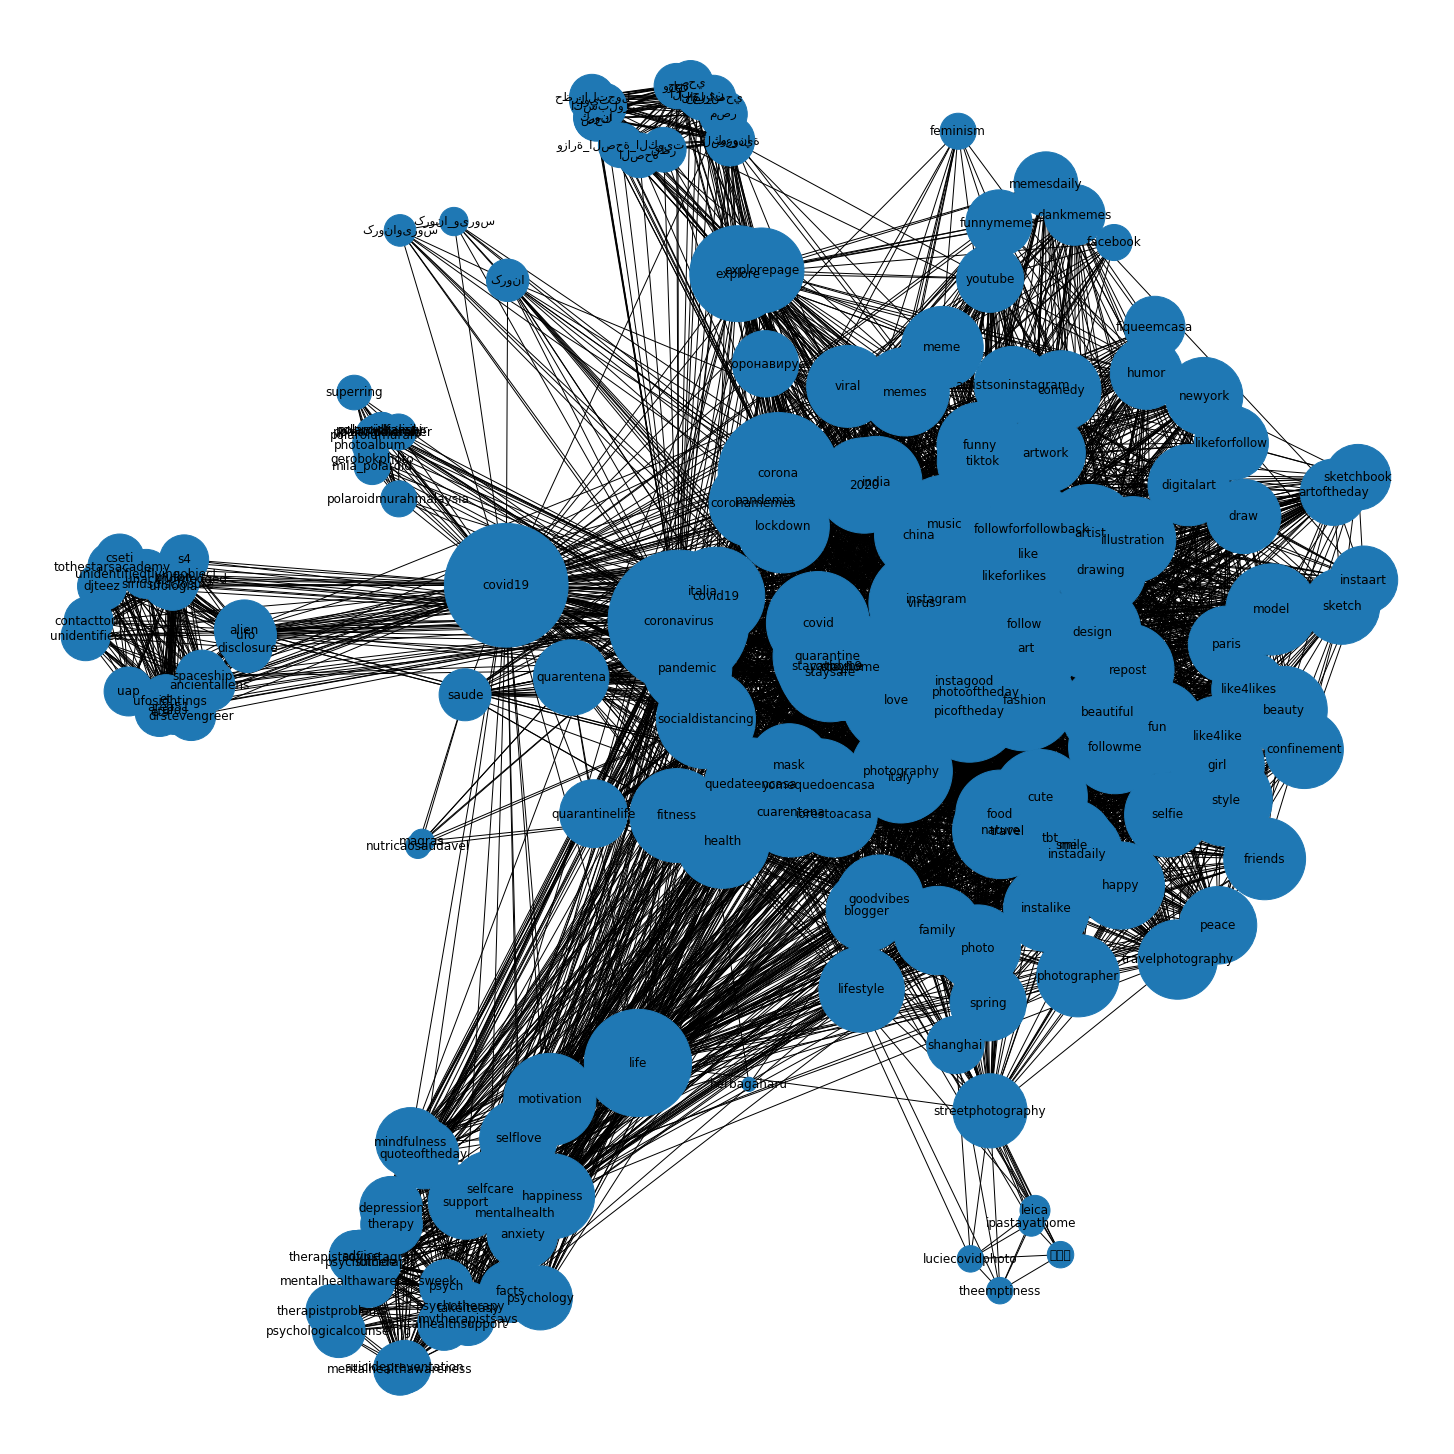

In [78]:
fig = plt.figure(figsize=(20,20))

d = dict(G.degree)

nx.draw(G,with_labels=True, nodelist=d.keys(), node_size=[v * 100 for v in d.values()])

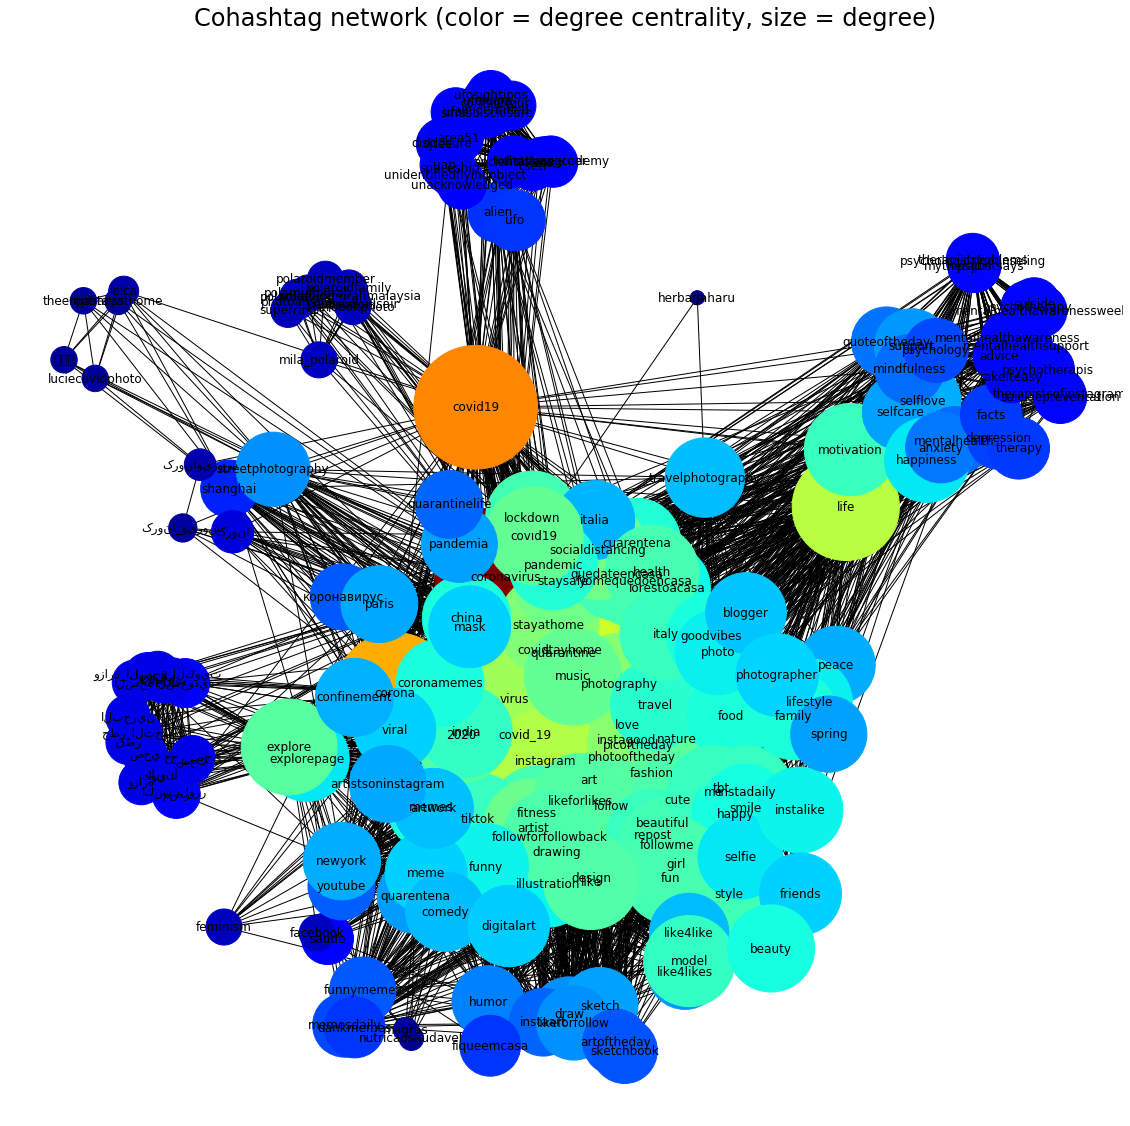

In [146]:
fig = plt.figure(figsize=(20,20))
plt.title('Cohashtag network (color = degree centrality, size = degree)', fontsize=24)

d = dict(G.degree)

c = nx.degree_centrality(G)

nx.draw(G,with_labels=True, nodelist=d.keys(), node_color=np.array(list(c.values())).astype(float),node_size=[v * 100 for v in d.values()], cmap=plt.cm.jet)

plt.show()

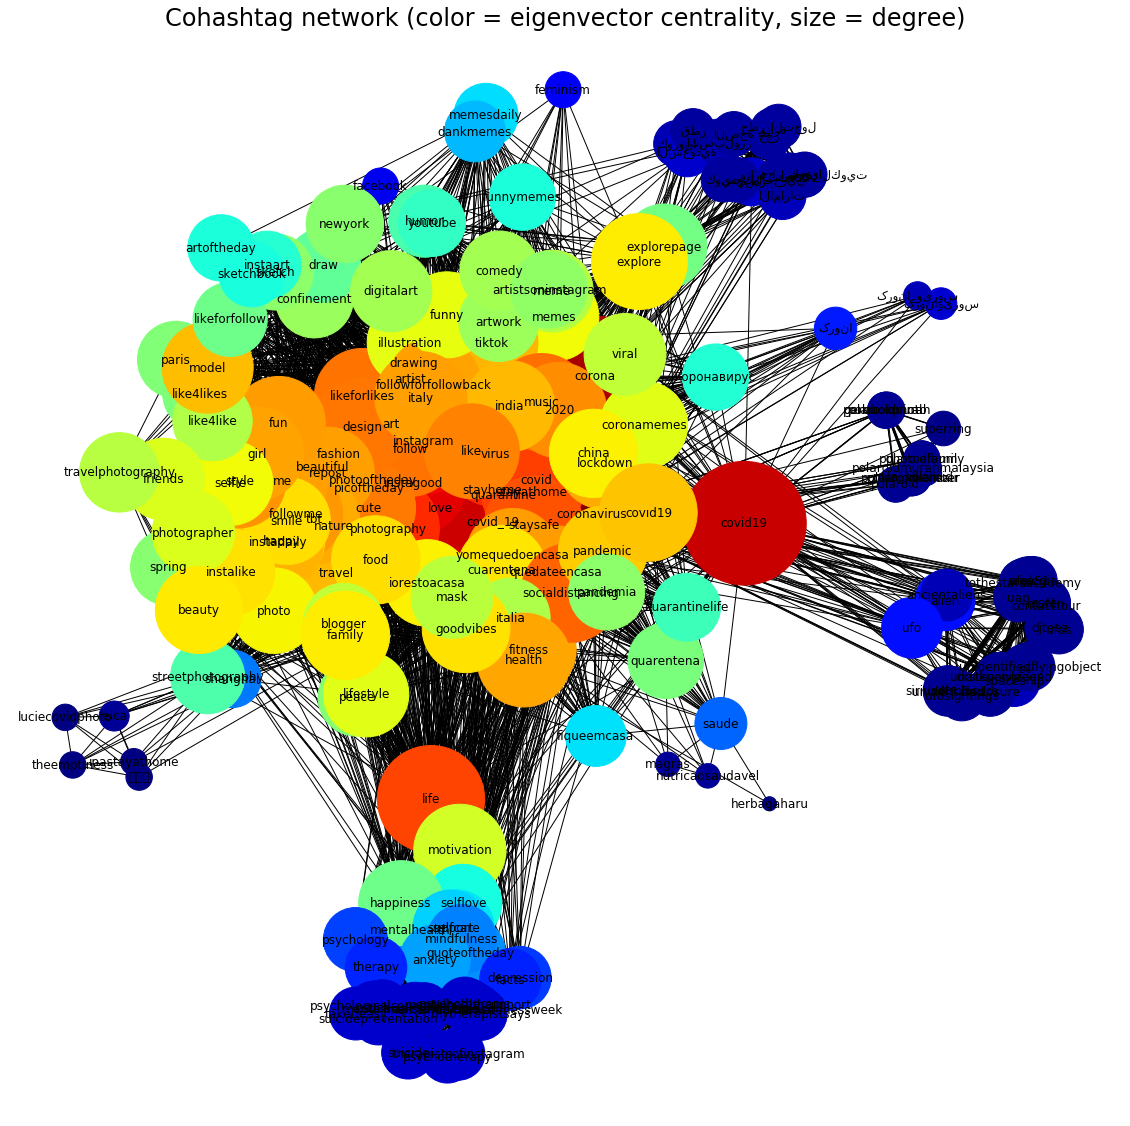

In [147]:
fig = plt.figure(figsize=(20,20))
plt.title('Cohashtag network (color = eigenvector centrality, size = degree)', fontsize=24)

d = dict(G.degree)

c = nx.eigenvector_centrality(G)

nx.draw(G,with_labels=True, nodelist=d.keys(), node_color=np.array(list(c.values())).astype(float),node_size=[v * 100 for v in d.values()], cmap=plt.cm.jet)

plt.show()

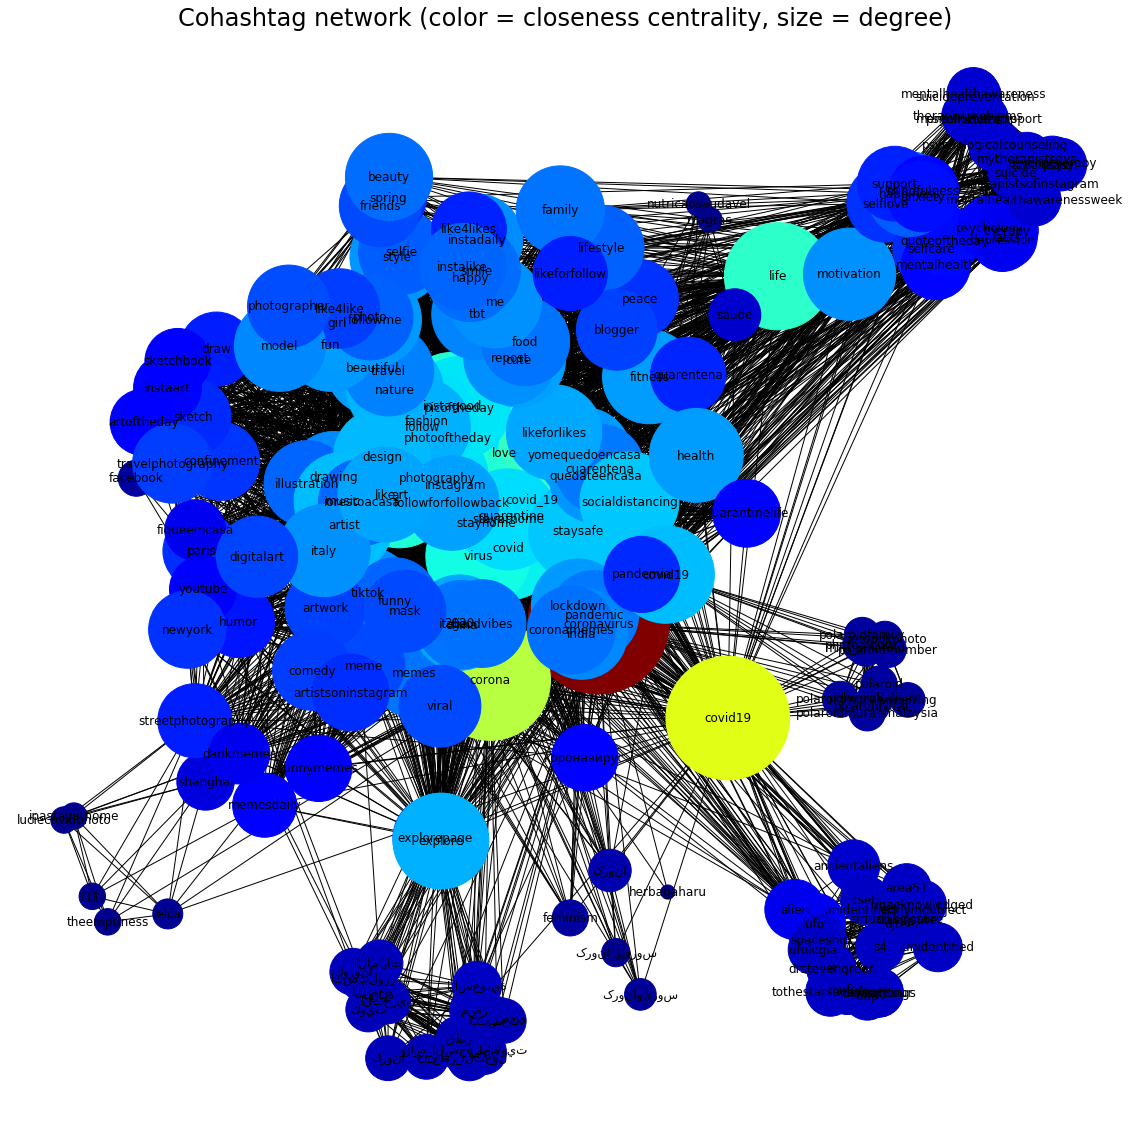

In [148]:
fig = plt.figure(figsize=(20,20))
plt.title('Cohashtag network (color = closeness centrality, size = degree)', fontsize=24)

d = dict(G.degree)

c = nx.closeness_centrality(G)

nx.draw(G,with_labels=True, nodelist=d.keys(), node_color=np.array(list(c.values())).astype(float),node_size=[v * 100 for v in d.values()], cmap=plt.cm.jet)

plt.show()

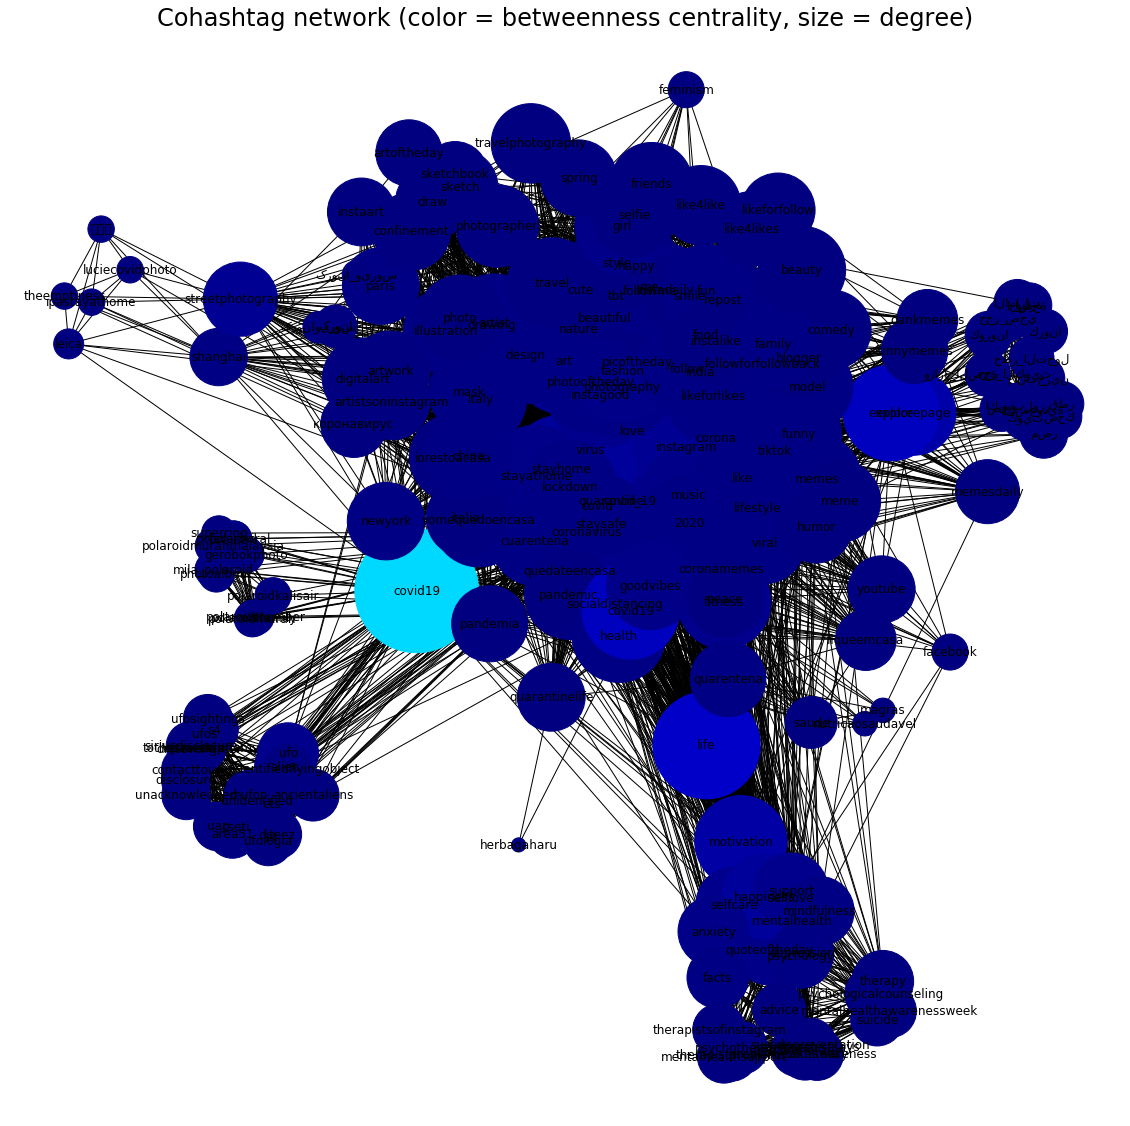

In [151]:
fig = plt.figure(figsize=(20,20))
plt.title('Cohashtag network (color = betweenness centrality, size = degree)', fontsize=24)

d = dict(G.degree)

c = nx.betweenness_centrality(G)

nx.draw(G,with_labels=True, nodelist=d.keys(), node_color=np.array(list(c.values())).astype(float),node_size=[v * 100 for v in d.values()], cmap=plt.cm.jet)

plt.show()

Text(0, 0.5, 'degree centrality')

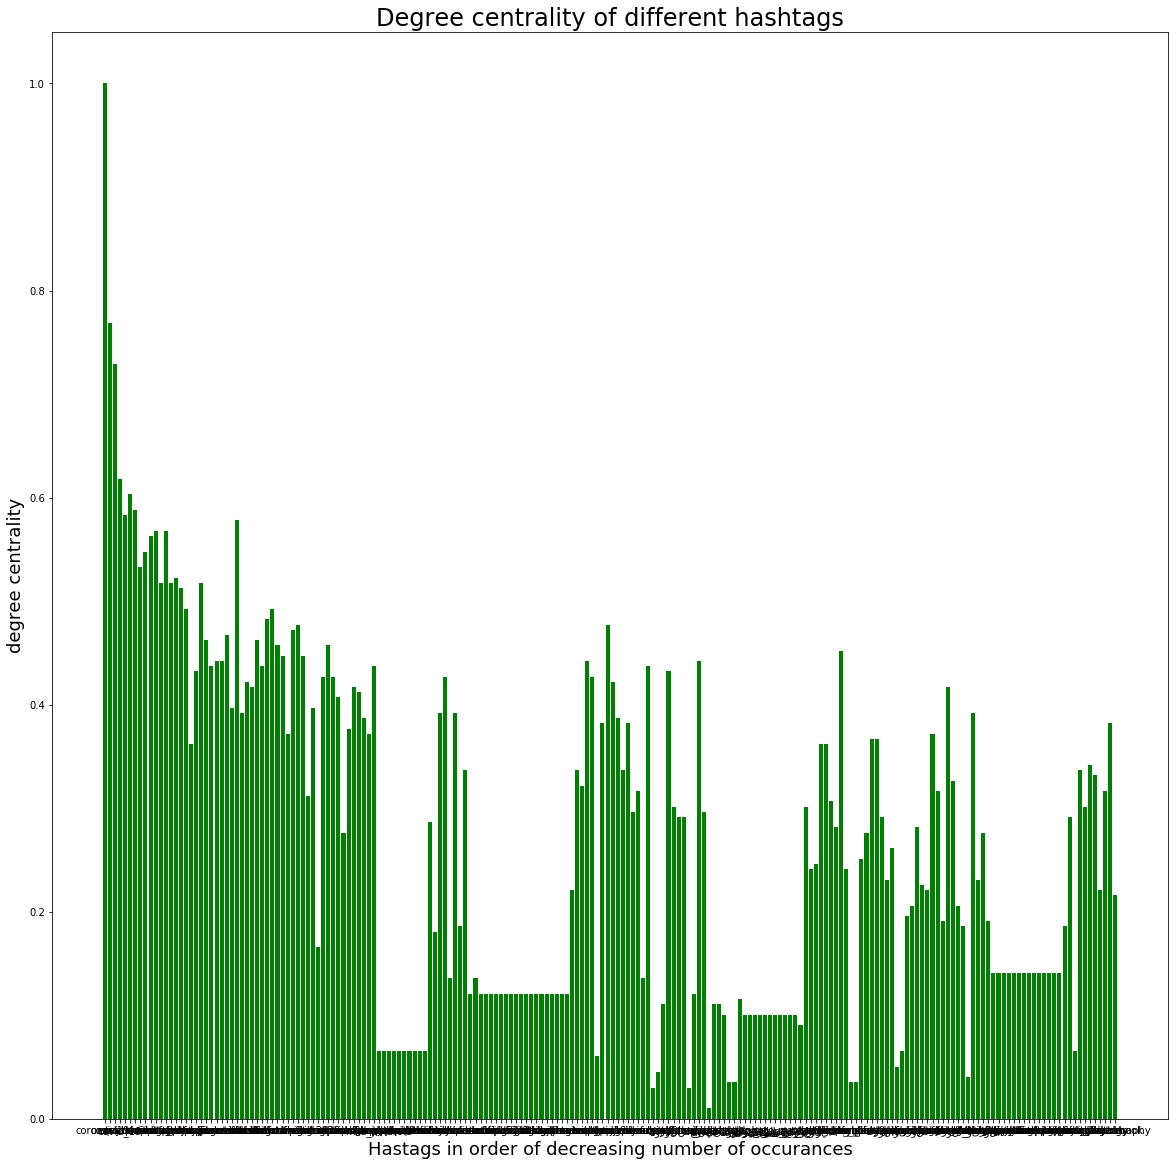

In [79]:
deg_centrality = nx.degree_centrality(G)
fig2 = plt.figure(figsize=(20,20))
plt.title('Degree centrality of different hashtags', fontsize=24)
plt.bar(deg_centrality.keys(), deg_centrality.values(), color='g')
plt.xlabel("Hastags in order of decreasing number of occurances", fontsize = 18)
plt.ylabel("degree centrality", fontsize = 18)

Text(0, 0.5, 'Closeness centrality')

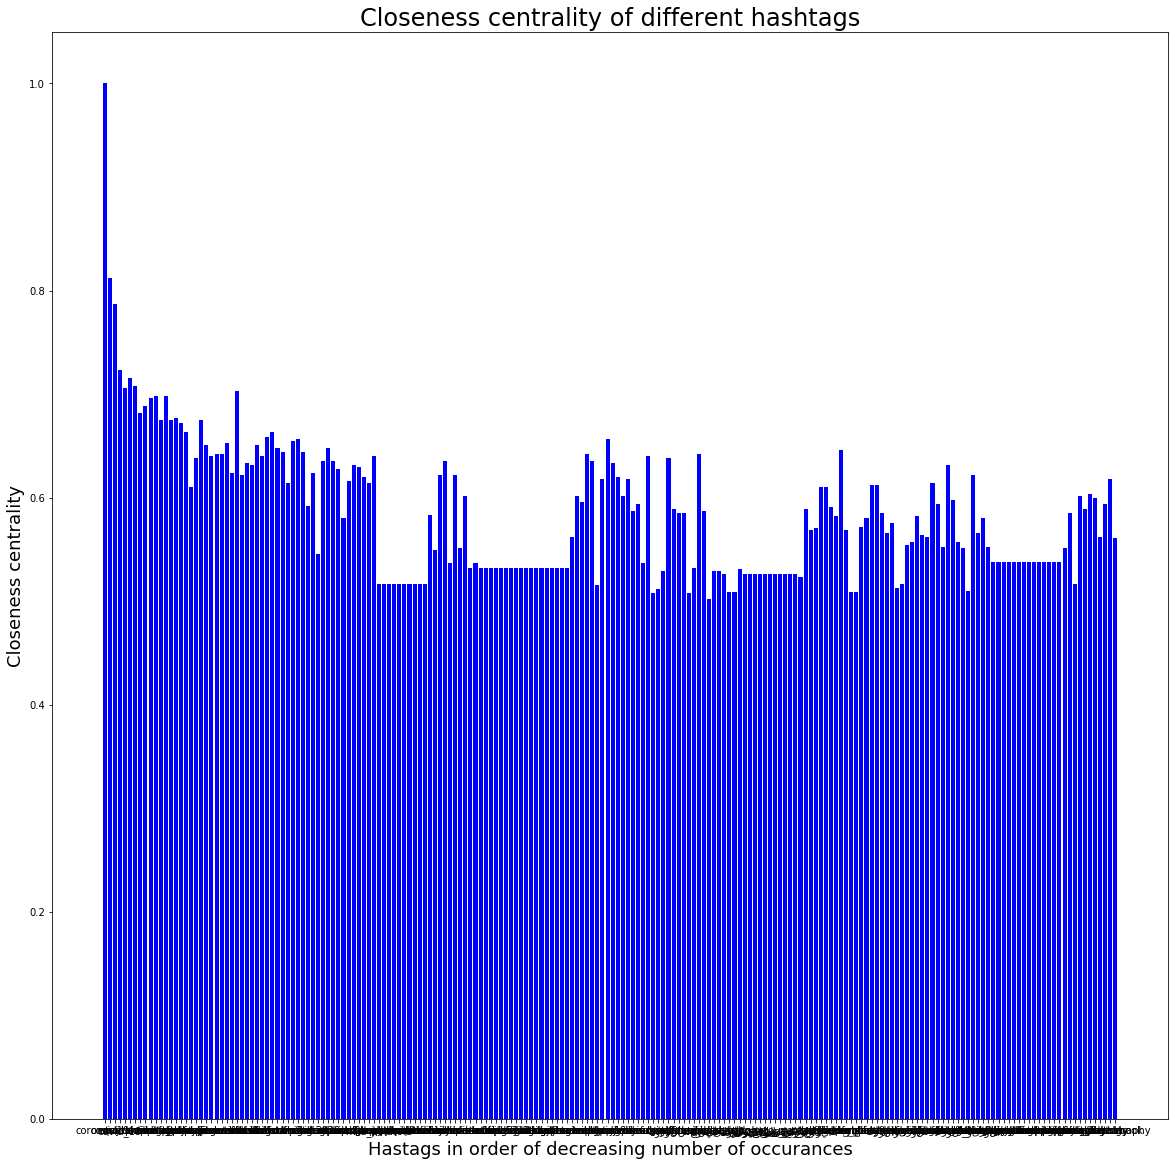

In [87]:
closeness_centrality = nx.closeness_centrality(G)
fig3 = plt.figure(figsize=(20,20))
plt.title('Closeness centrality of different hashtags', fontsize=24)
plt.bar(closeness_centrality.keys(), closeness_centrality.values(), color='b')
plt.xlabel("Hastags in order of decreasing number of occurances", fontsize = 18)
plt.ylabel("Closeness centrality", fontsize = 18)

Text(0, 0.5, 'Betweenness centrality')

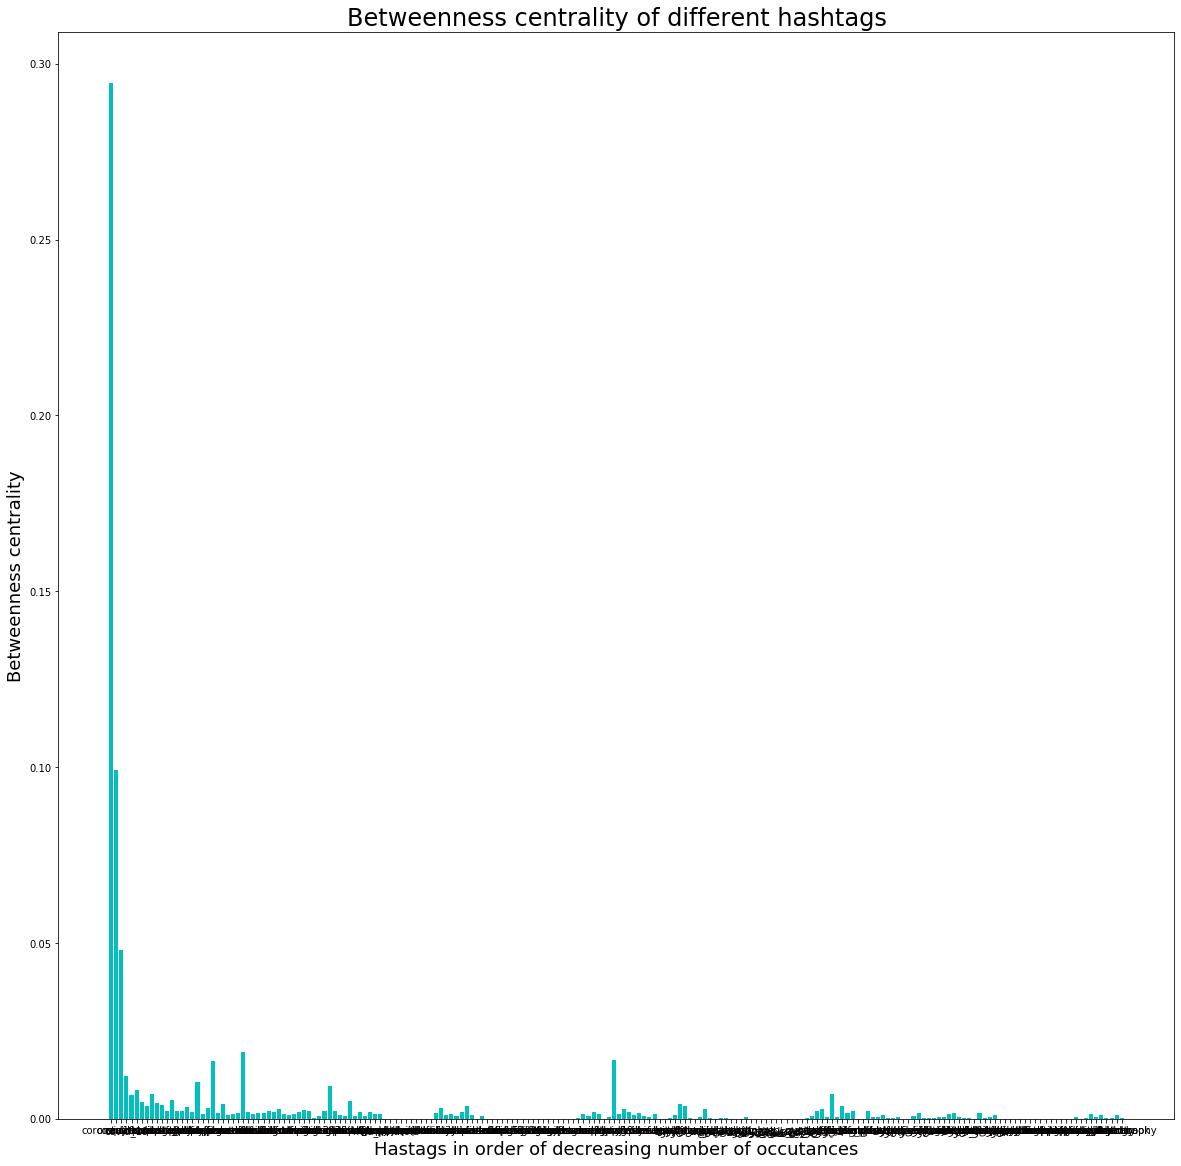

In [104]:
#betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
fig5 = plt.figure(figsize=(20,20))
plt.title('Betweenness centrality of different hashtags', fontsize=24)
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values(), color='c')
plt.xlabel("Hastags in order of decreasing number of occutances", fontsize = 18)
plt.ylabel("Betweenness centrality", fontsize = 18)

Text(0, 0.5, 'Eigenvector centrality')

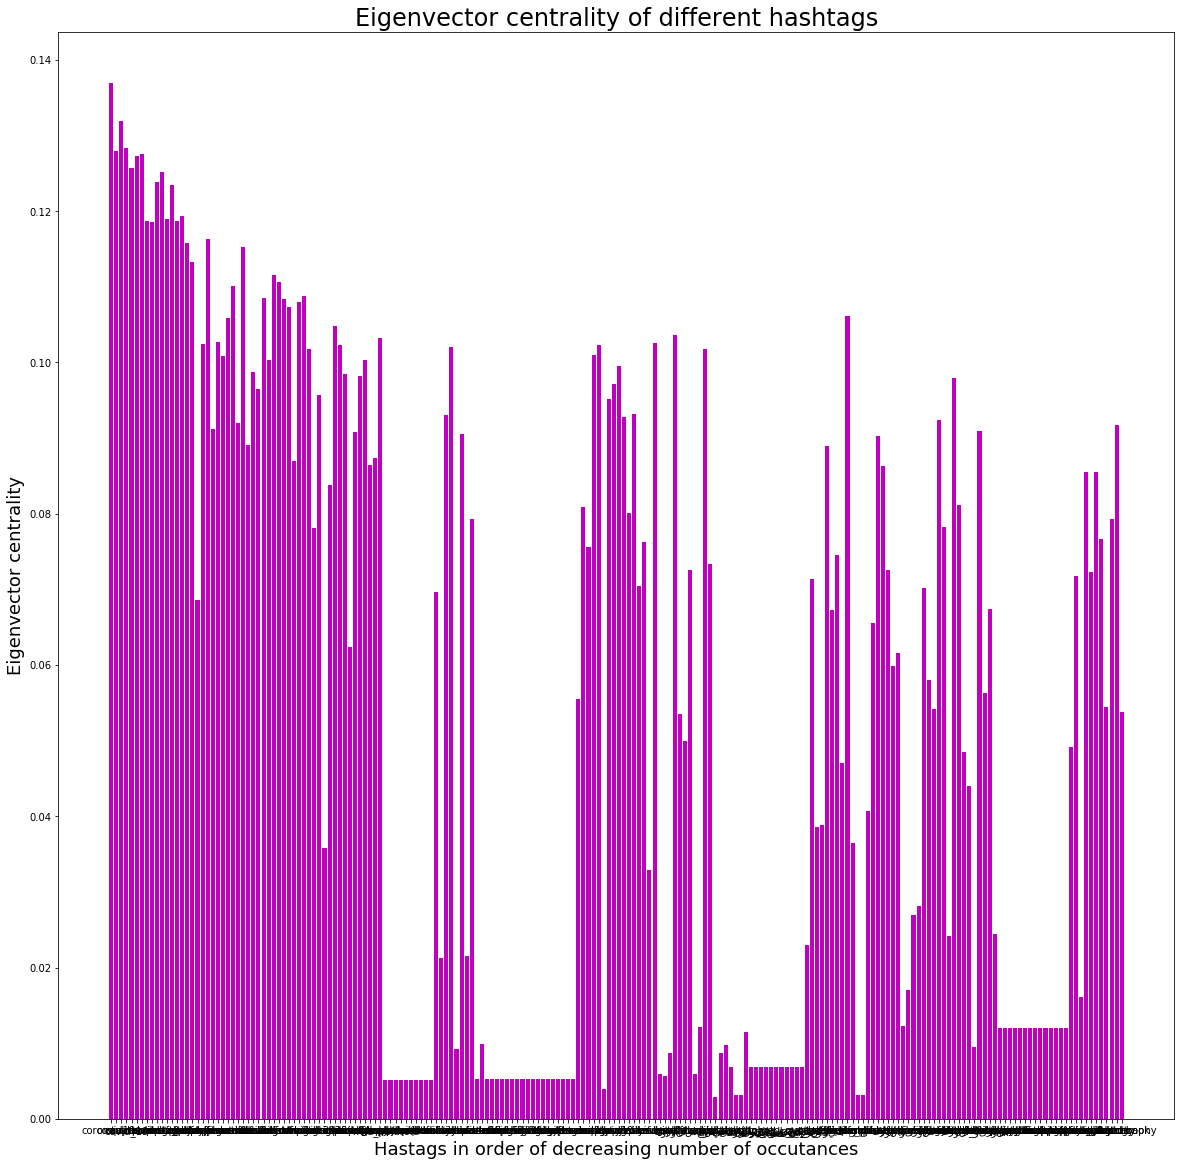

In [105]:
#eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
fig5 = plt.figure(figsize=(20,20))
plt.title('Eigenvector centrality of different hashtags', fontsize=24)
plt.bar(eigenvector_centrality.keys(), eigenvector_centrality.values(), color='m')
plt.xlabel("Hastags in order of decreasing number of occutances", fontsize = 18)
plt.ylabel("Eigenvector centrality", fontsize = 18)

Text(0, 0.5, 'Average distance')

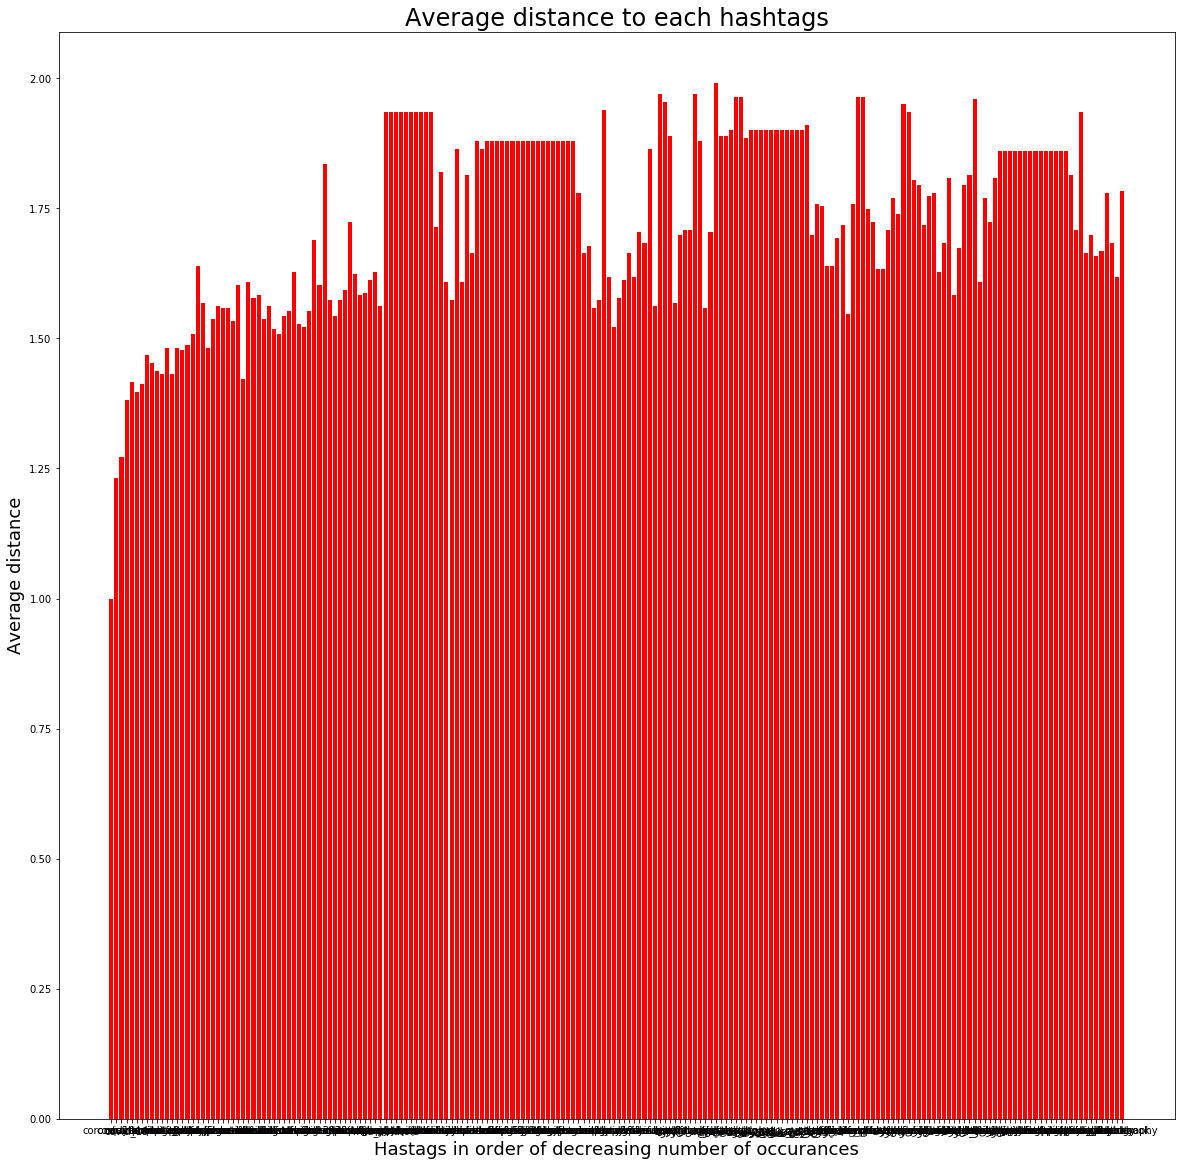

In [94]:
#average distance between hastags

distances_avg = {x: 1/y for (x, y) in closeness_centrality.items()}
fig4 = plt.figure(figsize=(20,20))
plt.title('Average distance to each hashtags', fontsize=24)
plt.bar(distances_avg.keys(), distances_avg.values(), color='r')
plt.xlabel("Hastags in order of decreasing number of occurances", fontsize = 18)
plt.ylabel("Average distance", fontsize = 18)